In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [10]:
#look at row data for measurement table
first_row_m=session.query(measurement).first()
first_row_m.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2314ba33c50>,
 'tobs': 65.0,
 'id': 1,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'prcp': 0.08}

In [11]:
inspector=inspect(engine)
m_columns=inspector.get_columns('measurement')
for c in m_columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
#look at row data for station table
first_row_s=session.query(station).first()
first_row_s.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2314ba4ac90>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US'}

In [13]:
s_columns=inspector.get_columns('station')
for c in s_columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [24]:
# Calculate the date one year from the last date in data set.
yearago_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# print(yearago_date)

# Perform a query to retrieve the data and precipitation scores
results=session.query(measurement.date, measurement.prcp).order_by(measurement.date.asc()).filter(measurement.date>=yearago_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
date_prcp_df=pd.DataFrame(results)
date_prcp_df=date_prcp_df.rename(columns={'prcp':'Precipitation Score'})


# Sort the dataframe by date
# date_prcp_df['date'] = pd.to_datetime(date_prcp_df['date'])
# date_prcp_df=date_prcp_df.set_index(['date'], inplace=True)
date_prcp_df.sort_values(by='date', ascending=True)
# date_prcp_df=date_prcp_df.dropna()
# date_prcp_df=date_prcp_df.reset_index(drop=True)
date_prcp_df

,date,Precipitation Score
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [16]:
date_prcp_df.describe()

,Precipitation Score
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


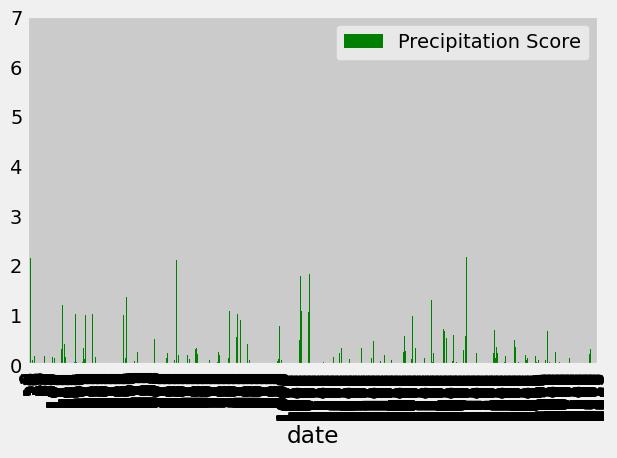

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# # Calculate the date one year from the last date in data set.
# yearago_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# # print(yearago_date)

# # Perform a query to retrieve the data and precipitation scores
# results=session.query(measurement.date, measurement.prcp).order_by(measurement.date.asc()).filter(measurement.date>=yearago_date).all()

# # Save the query results as a Pandas DataFrame. Explicitly set the column names
# date_prcp_df=pd.DataFrame(results)
# date_prcp_df=date_prcp_df.rename(columns={'prcp':'Precipitation Score'})


# # Sort the dataframe by date
# # date_prcp_df['date'] = pd.to_datetime(date_prcp_df['date'])
# # date_prcp_df=date_prcp_df.set_index('date', inplace=True)
# date_prcp_df.sort_values(by='date', ascending=True)
# date_prcp_df=date_prcp_df.dropna()
# # date_prcp_df=date_prcp_df.reset_index(drop=True)
# date_prcp_df


# # # Use Pandas Plotting with Matplotlib to plot the data
# plt.style.use('fivethirtyeight')
PrecipGraph=date_prcp_df.plot.bar(color='green', grid=True)
plt.xlabel('date')
plt.tight_layout()
# plt.setp(PrecipGraph.get_xticklabels(), visible=False)
plt.show()


In [70]:
results

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [71]:
date_prcp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2021 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 2021 non-null   object 
 1   Precipitation Score  2021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.4+ KB


<Axes: xlabel='date'>

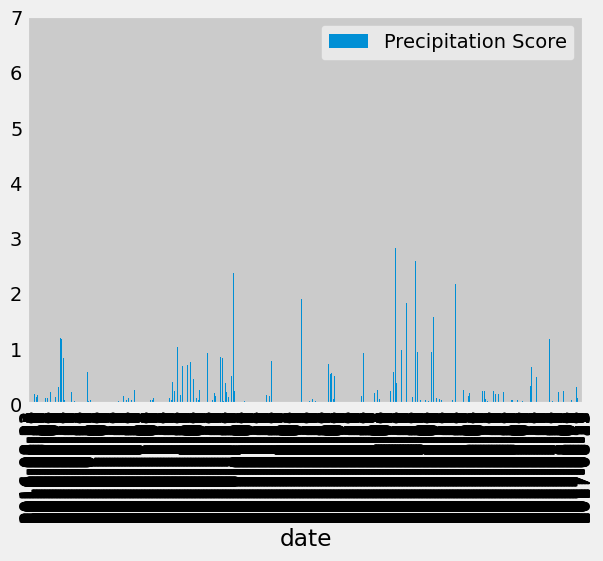

In [73]:
date_prcp_df.set_index("date").plot.bar()

In [76]:
# date_prcp_df['date'] = pd.to_datetime(date_prcp_df['date'])

# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number of stations in the dataset
stat_count=session.query(station.id).count()
stat_count

9

In [22]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station=session.query(measurement.station,func.count(measurement.station)).\
                       group_by(measurement.station).\
                       order_by(func.count(measurement.station).desc()).all()
active_station


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
most_active=active_station[0][0]
                       
most_active

'USC00519281'

In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_stats=session.query(func.min(measurement.tobs), func.max(measurement.tobs),func.avg(measurement.tobs)).\
                        filter(measurement.station==most_active).all()
temp_stats


[(54.0, 85.0, 71.66378066378067)]

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
temp_result=session.query(measurement.station, measurement.tobs).filter(measurement.station==most_active).\
                        filter(measurement.date >=yearago_date).all()

# Dataframe
Temp_df=pd.DataFrame(temp_result)
Temp_df.set_index('station', inplace=True)
Temp_df.head()

,tobs
station,
USC00519281,77.0
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0


Text(0.5, 0, 'Temperature')

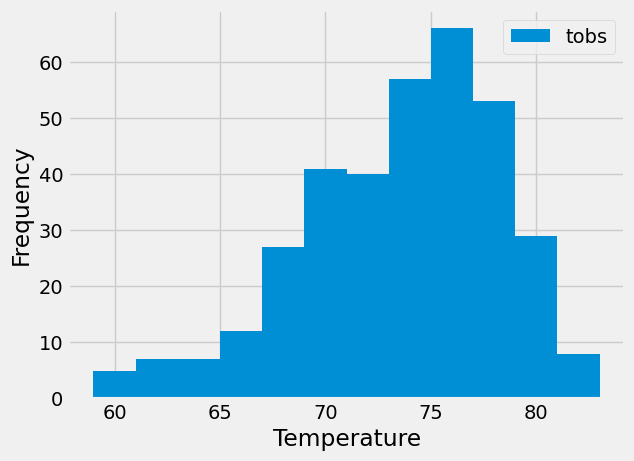

In [27]:
# plot the results as a histogram

Temp_df.plot.hist( bins=12)
plt.xlabel('Temperature')

# Close Session

In [28]:
# Close Session
session.close()